# Visualización de la Información

# Práctica 7

Juan Pablo Hernández Lozano

## Limpieza de Datos

- Haga la lectura del dataset en el fichero “`Canada.xls`”. Use la Hoja del excel nombrada '`Canada by Citizenship`'. Este fichero contiene datos de migración hacia Canada desde diferentes países en los 5 continentes (periodo 1980-2013 ).

In [33]:
import pandas as pd    
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns 

In [34]:
canCitizenship = pd.read_excel("Canada.xls", sheet_name= "Canada by Citizenship", header=20)
canCitizenship.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Haga una limpieza de los datos para facilitar la creación de las visualizaciones.

- Remueva las columnas "`AREA`", "`REG`", "`DEV`", "`Type`", "`Coverage`".

In [35]:
canCitizenship.drop(columns=['AREA', 'REG', 'DEV', "Type", "Coverage"], inplace=True)
print('Nuevo número de columnas :', len(list(canCitizenship.columns)))

Nuevo número de columnas : 38


Observamos que ahora tenemos 38 columnas de las 43 iniciales.

- Ponga nombres más adecuados a las columnas "`OdName`", "`AreaName`" y "`RegName`".

In [36]:
canCitizenship.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
print('Nuevos nombres: \n', canCitizenship.columns[0:3])

Nuevos nombres: 
 Index(['Country', 'Continent', 'Region'], dtype='object')


- Asegurese de que todas las columnas (`DataFrame.columns`) corresponden a tipo '`string`'.

In [37]:
canCitizenship['Country'].astype(str)
canCitizenship['Continent'].astype(str)
canCitizenship['Region'].astype(str)

print(canCitizenship.columns[0:3])

Index(['Country', 'Continent', 'Region'], dtype='object')


- Use el método `set_index()` del dataFrame para que los índices de las entradas sean los países.

In [38]:
canInmigartion = canCitizenship.copy()
canCitizenship.set_index('Country', inplace=True)
canCitizenship.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


- Adicione una columna de **Total**, en donde esta represente la suma del flujo total de migrantes hacia Canada desde los diferentes paises a lo largo de los años.

In [39]:
canCitizenship['Total'] = canCitizenship.iloc[:, 3:37].sum(axis=1)

In [40]:
canCitizenship['Total']

Country
Afghanistan         58639
Albania             15699
Algeria             69439
American Samoa          6
Andorra                15
                   ...   
Yemen                2985
Zambia               1677
Zimbabwe             8598
Unknown            515059
Total             6924212
Name: Total, Length: 197, dtype: int64

## Pie Charts

Genere un conjunto de datos que se encuentre agrupado por continente. El dataFrame de salida tendrá 6 filas y 35 columnas. Sugerencia: aplique la función `sum()` a los datos agrupados para que el resultado del agrupamiento sea efectivamente un DataFrame (`pandas.core.frame.DataFrame`).

In [41]:
inmigration_by_continent = canCitizenship.groupby('Continent').sum().head(6)
inmigration_by_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Usando el método `plot` de **pandas** haga un gráfico tipo pastel del total de migración por cada continente, en el que incluya los porcentajes (usando el parámetro `autopct`). No olvide poner título a su gráfico. Ponga también el parámetro `startangle=90`.

<AxesSubplot:title={'center':'Inmigration to Canada by continent 1980-2013'}, ylabel='Total'>

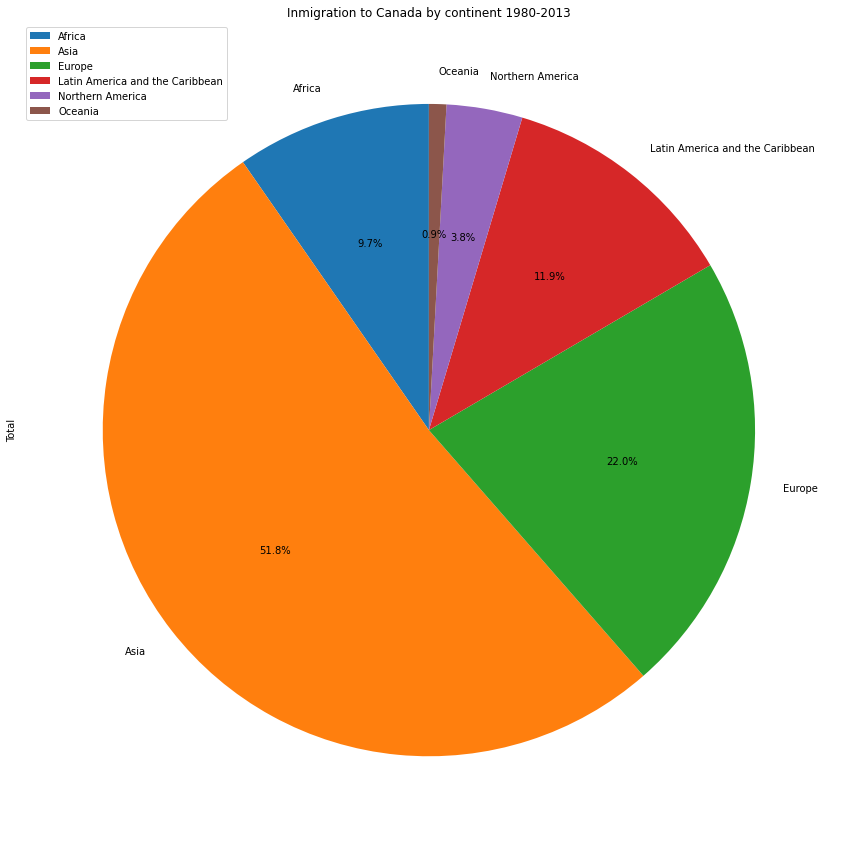

In [42]:
inmigration_by_continent.plot.pie(y='Total', figsize=(15, 15), startangle=90, autopct='%1.1f%%', title = 'Inmigration to Canada by continent 1980-2013')

Haga una mejora del gráfico generado:

- Presente las etiquetas usando `plt.legend()`.
- Haga que los valores de los porcentajes se presenten en la parte exterior del gráfico usando el parámetro `pctdistance`.
- Use un esquema adecuado de colores usando el parámetro `colors`.
- Use el parámetro `explode` para hacer énfasis en los 3 continentes que representan una menor área.

In [43]:
sortedContinents = inmigration_by_continent.sort_values(by = 'Total')
#sortedContinents

In [44]:
from colour import Color
light = Color("turquoise")
colors = list(light.range_to(Color("mediumvioletred"),6))

colores = []
for clr in colors:
    colores.append(str(clr))



explode = (0.25,0.15,0.15, 0, 0., 0.05)
font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 32,}

font2 = {'family': 'monospace',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 16,}


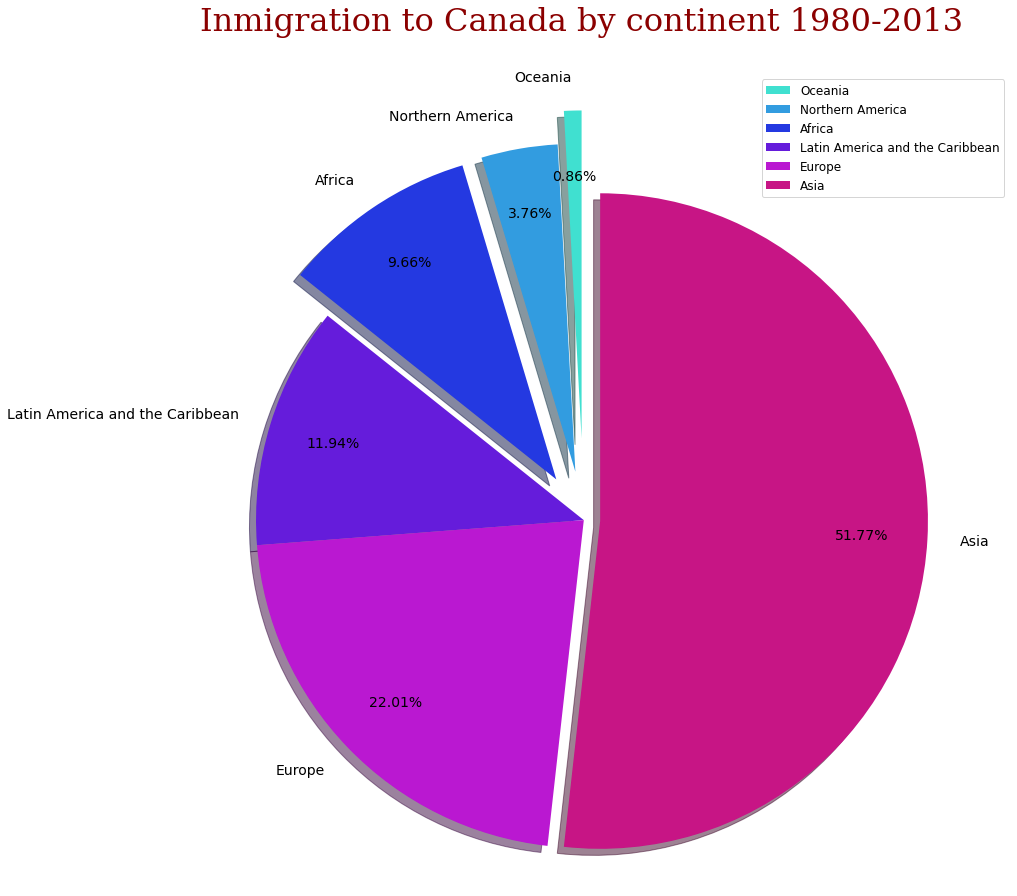

In [45]:
fig1, ax1 = plt.subplots(figsize=(15, 15))

ax1.pie(sortedContinents['Total'], explode=explode, labels=sortedContinents.index, autopct='%1.2f%%',
        shadow=True, startangle=90, colors = colores, pctdistance = .8, textprops={'fontsize': 14})
ax1.axis('equal') 

plt.legend(fontsize = 12)
plt.title('Inmigration to Canada by continent 1980-2013  \n',  fontdict = font1)
plt.show()

Explique las mejoras que se pueden observar respecto al gráfico anterior. ¿Qué otras mejoras podría implementar? (No olvide poner título a su gráfico).

En este último gráfico se mejoraron los colores que representan a cada continente en forma de un gradientes de colores que empieza en azul con el continente que presenta menor migración hasta un tono violeta para representar a Asia (el continente con mayor migración.) También podemos observar de mejor manera la representación de los tres continentes con menor migración pues sus porciones respectivas se encuentran un poco separadas del grafico principal. Por último se mejoraron las fuentes para los textos de tal forma que ahora son más claras y el título destaca de los demás textos.

## Burbujas

Una **bubble plot** es una variante del **scatter plot** que muestra 3 dimensiones de los datos $(x, y, z)$. La posición en el plano de cada dato se representa con una burbuja mediante las variables "`x`", "`y`"; pero el tamaño de cada burbuja está dado por la tercera variable "`z`" (conocido también como el peso). 

**Paso 1:** Obtener los datos para **Argentina** y **Brasil**. Convierta los años (1980:2013) en una columna (variable tipo `int`) e incorporelas en el dataFrame (transpuesto).

In [46]:
bubledf = canCitizenship.loc[['Argentina','Brazil'],:]
bubledf.drop(columns=['Continent', 'Region', 'DevName', "Total"], inplace=True)
bubledf

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Brazil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714


In [47]:
bubledf = bubledf.T

**Paso 2:** Haga normalización de cada columna al rango $[0,1]$ usando la fórmula $$z_i = \frac{x_i - x_{min}}{x_{max} - x_{min}} $$

In [48]:
def minMax(dataframe):
    return (dataframe - min(dataframe))/(max(dataframe)-min(dataframe))

In [49]:
for col in bubledf.columns:
    bubledf[col] = minMax(bubledf[col])
bubledf.head()

Country,Argentina,Brazil
1980,0.111039,0.032820
1981,0.148483,0.036467
1982,0.277598,0.025122
1983,0.029051,0.003647
1984,0.026469,0.006078


**Paso 3:** Pintar los datos.

- Incluir los dos gráficos de dispersión en una sola figura.

- En cada gráfico de `scatter` (`df.plot(kind="scatter")`) use el parámetro "`s`". La entrada de este parámetro serán los pesos normalizados en el rango $[0,1]$ obtenidos anteriormente. Para poder visualizar bien cada burbuja, haga "`s = norm_values * var_rad + min_rad`", donde `norm_values` son los valores normalizados, "`var_rad`" será el valor de variación del radio de las burbujas y "`min_rad`" será el radio mínimo para cada burbuja.

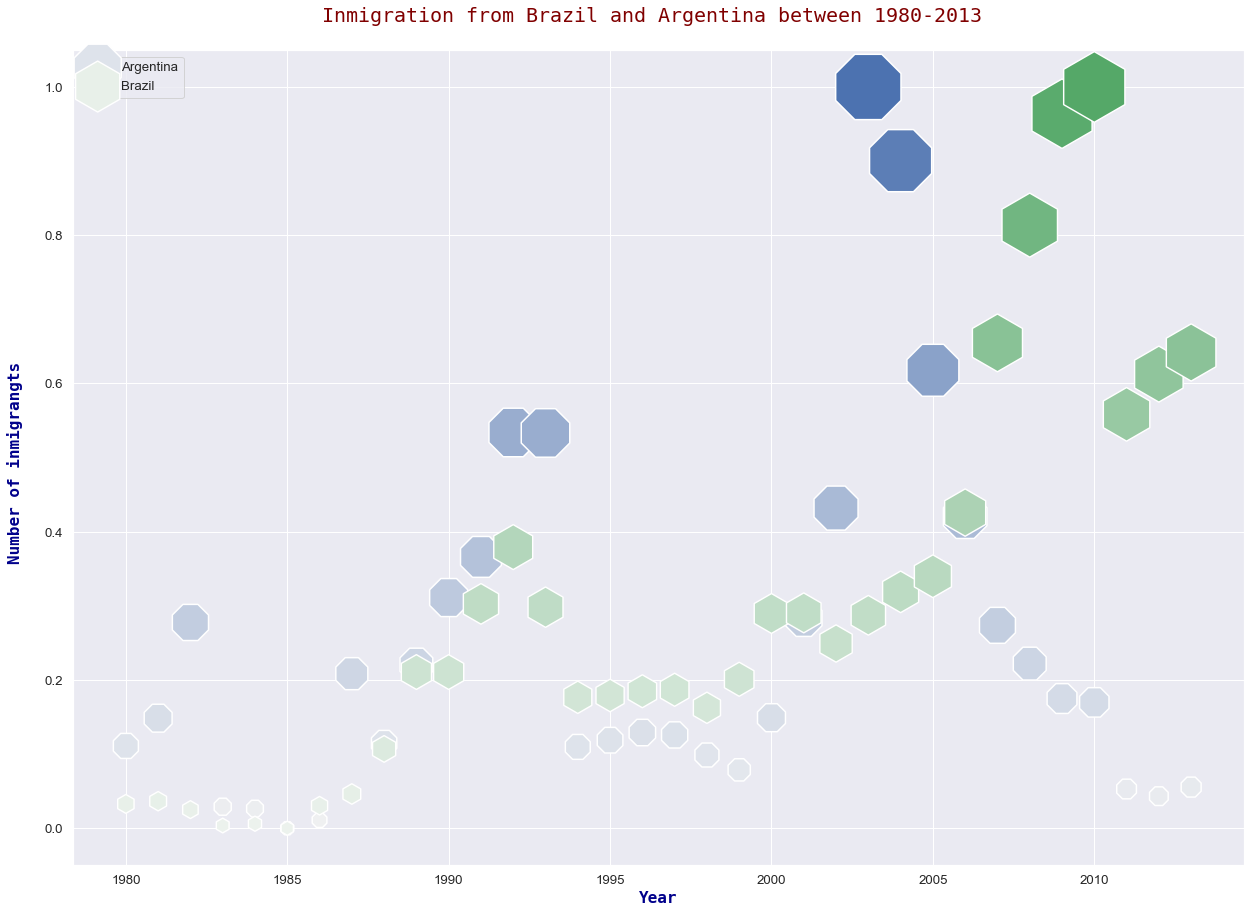

In [61]:
bubledf['ArgS'] = bubledf['Argentina']*bubledf['Argentina'].var()
bubledf['BraS'] = bubledf['Brazil']*bubledf['Brazil'].var()

plt.figure(figsize=(21,15))

sns.set_style("darkgrid")

sns.scatterplot(x = bubledf.index, y = 'Argentina', size= 'ArgS', data = bubledf, sizes=(200, 5000), hue = 'ArgS', palette='light:b' ,legend=False, marker = '8')\
    .set_title("Inmigration from Brazil and Argentina between 1980-2013 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal' ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
sns.scatterplot(x = bubledf.index, y = 'Brazil', size= 'BraS', data = bubledf, sizes=(200, 5000), hue = 'BraS', palette= 'light:g',legend=False, marker = 'h')
plt.xlabel("Year", fontdict = font2)
plt.ylabel("Number of inmigrangts \n", fontdict = font2)
plt.legend(labels = ['Argentina','Brazil'], loc = 'upper left')

¿Qué puede decir del anterior gráfico respecto a las tendencias de migración desde ambos países?

Podemos observar que hasta principios del siglo ambos países presentaron una tendencia creciente en cuanto al número de inmigrantes, co un pico especial para mediados de los 90. Ambos países reportan sus exportaciones máximas en el siglo 21, sin embargo Brasil bajó sus numeros rápidamente mientras que argentina aumentó el número de inmigrantes.

Repita el proceso para los datos de migración desde los dos países que aportan mayor número de migrantes hacia Canada. (Esta pregunta se contesta al final del documento.)

## Histogramas

Cuál es la distribución de datos de inmigración desde **Dinamarca**, **Noruega** y **Suecia** para el período comprendido entre los años **1980** - **2013**?

- Mejore, según su criterio, la visualización presentada por defecto.

In [51]:
canHist = canCitizenship.iloc[:,3:37].loc[['Denmark','Norway', 'Sweden'],:]
canHist

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


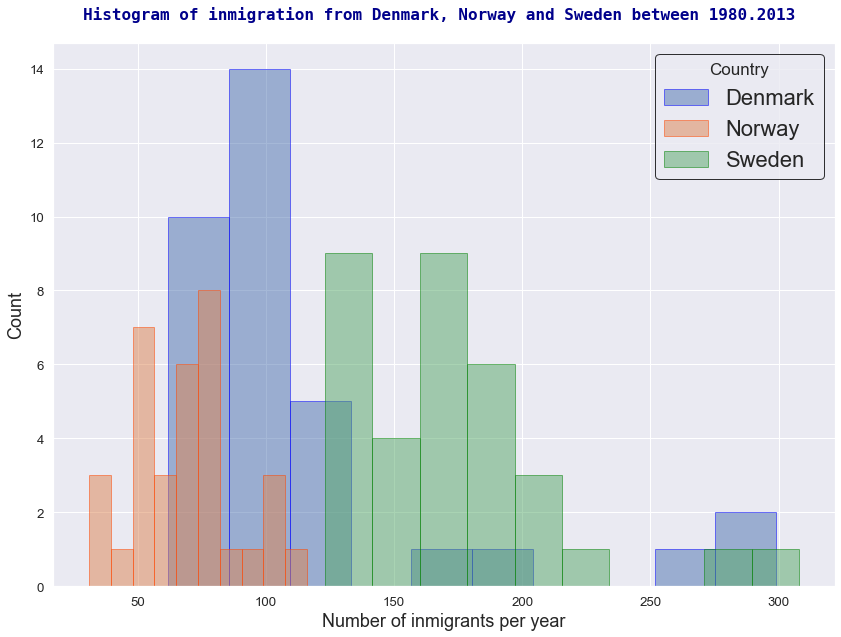

In [62]:
numpyhist = canHist.to_numpy()


plt.figure(figsize=(14,10))
plt.hist(numpyhist[0], bins=10, alpha=0.5, label="Denmark",histtype =  'barstacked', edgecolor = 'blue')
plt.hist(numpyhist[1], bins=10, alpha=0.5, label="Norway", histtype =  'barstacked', edgecolor = 'orangered')
plt.hist(numpyhist[2], bins=10, alpha=0.5, label="Sweden", histtype =  'barstacked', edgecolor = 'green')

plt.xlabel("Number of inmigrants per year", size=18)
plt.ylabel("Count", size=18)
plt.title("Histogram of inmigration from Denmark, Norway and Sweden between 1980.2013 \n", fontdict= font2)
plt.legend(loc='upper right', fontsize = 22, title = 'Country', edgecolor = 'black', title_fontsize = 17)




plt.show()

## Barras Horizontales

Encuentre los 15 países que más migración tuvieron hacia Canadá en el periodo de 1980-2013.

- Agregue color y legendas que permitan visualizar el continente que corresponde a cada barra horizontal.

In [53]:
top15 = canCitizenship.sort_values(by='Total', ascending=False).iloc[1:,:].head(15)
top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,World,44000,18078,16904,13635,14855,14368,13303,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

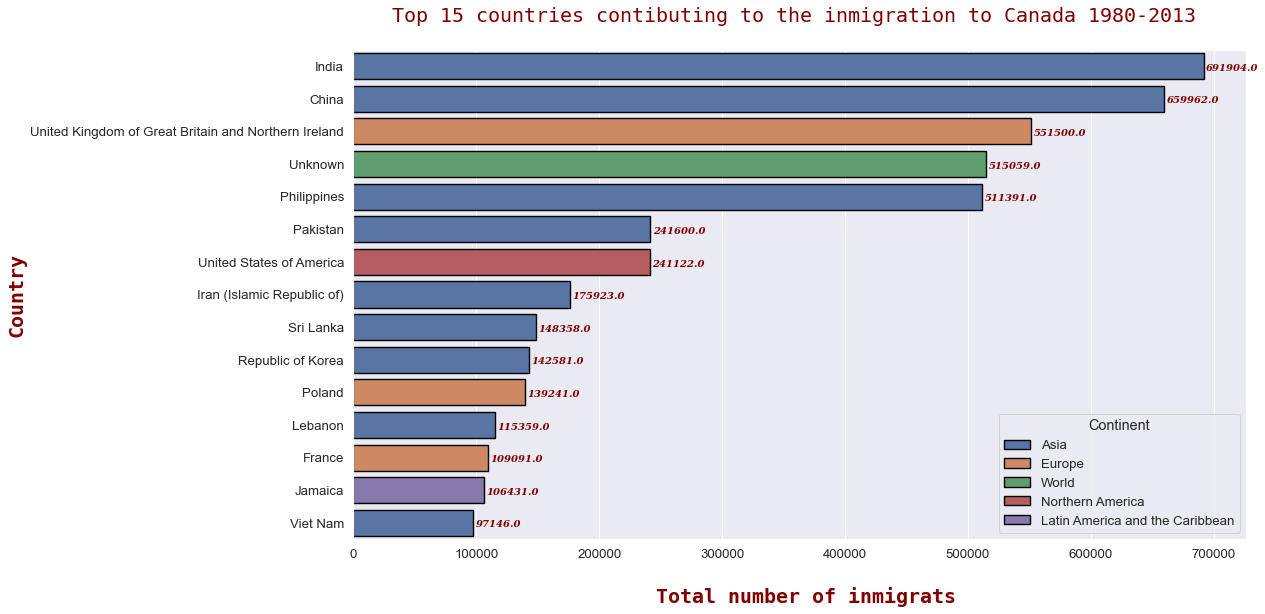

In [54]:
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
bar,ax = plt.subplots(figsize=(16,9))
ax = sns.barplot(x="Total", y=top15.index, data=top15,orient='h', hue = 'Continent', edgecolor = 'black', linewidth = 1.4, dodge=False,\
     hue_order = ['Asia','Europe','World','Northern America', 'Latin America and the Caribbean']) 
ax.set_title("Top 15 countries contibuting to the inmigration to Canada 1980-2013 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
ax.set_xlabel ("\n Total number of inmigrats",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
ax.set_ylabel ("Country",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
for rect in ax.patches:
    ax.text (rect.get_width()+2000, rect.get_y() + rect.get_height() / 1.5, s= rect.get_width(), weight='semibold', fontstyle = 'oblique', fontstretch = 'normal'\
        ,fontsize = 10, fontfamily = 'serif', color = 'maroon')
plt.show()

Repita el proceso anterior, pero ahora hágalo para 3 periodos diferentes: 1980-1989, 1990-1999, 2000-2009; de manera que pueda visualizar la evolución de los datos.

¿Qué conclusiones puede sacar?

**Nota**: *Ignorar los cuadros rojos*

In [55]:
inmi80 = canCitizenship.iloc[:,list(range(0,1)) + list(range(3, 13))]
inmi90 = canCitizenship.iloc[:,list(range(0,1)) + list(range(13, 23))]
inmi00 = canCitizenship.iloc[:,list(range(0,1)) + list(range(23, 33))]

inmi80['Total'] = inmi80.iloc[:, 1:11].sum(axis=1)
inmi90['Total'] = inmi90.iloc[:, 1:11].sum(axis=1)
inmi00['Total'] = inmi00.iloc[:, 1:11].sum(axis=1)

<ipython-input-55-d9254a5ef572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inmi80['Total'] = inmi80.iloc[:, 1:11].sum(axis=1)
<ipython-input-55-d9254a5ef572>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inmi90['Total'] = inmi90.iloc[:, 1:11].sum(axis=1)
<ipython-input-55-d9254a5ef572>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [56]:
top80s = inmi80.sort_values(by='Total', ascending=False).iloc[1:,:].head(15)
top90s = inmi90.sort_values(by='Total', ascending=False).iloc[1:,:].head(15)
top00s = inmi00.sort_values(by='Total', ascending=False).iloc[1:,:].head(15)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

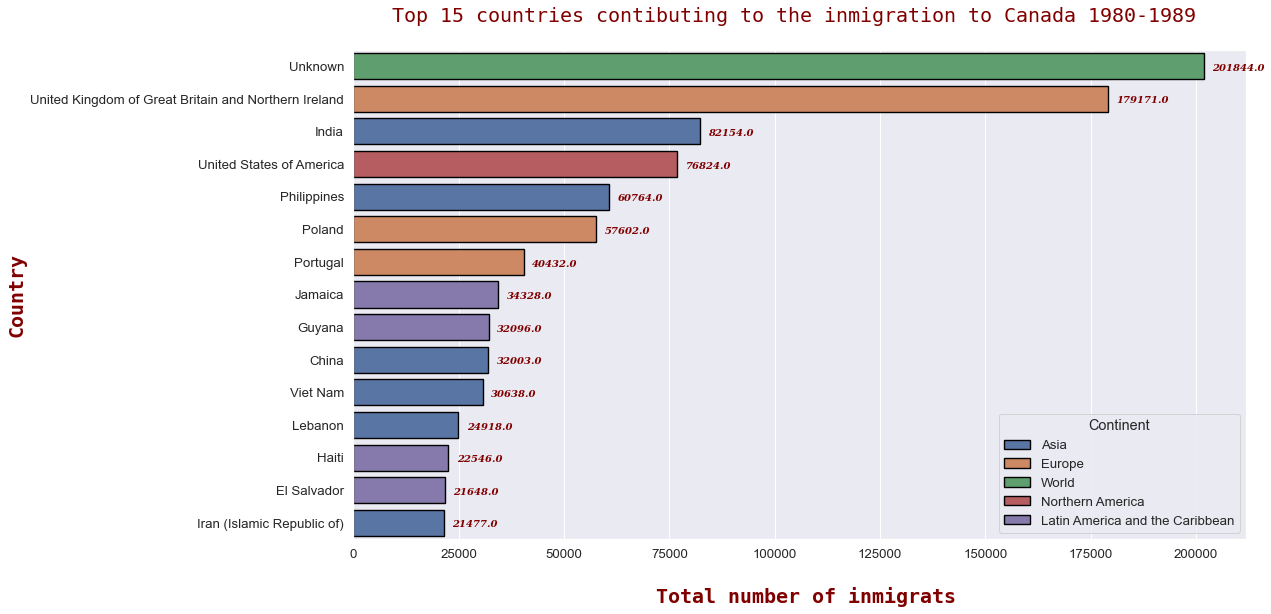

In [57]:
bar,ax = plt.subplots(figsize=(16,9))
ax = sns.barplot(x="Total", y=top80s.index, data=top80s, ci=None,orient='h', hue = 'Continent', edgecolor = 'black', linewidth = 1.4, dodge = False, \
    hue_order = ['Asia','Europe','World','Northern America', 'Latin America and the Caribbean']) 
ax.set_title("Top 15 countries contibuting to the inmigration to Canada 1980-1989 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
ax.set_xlabel ("\n Total number of inmigrats",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
ax.set_ylabel ("Country",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
for rect in ax.patches:
    ax.text (rect.get_width()+2000, rect.get_y() + rect.get_height() / 1.5, s= rect.get_width(), weight='semibold', fontstyle = 'oblique', fontstretch = 'normal'\
        ,fontsize = 10, fontfamily = 'serif', color = 'maroon')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

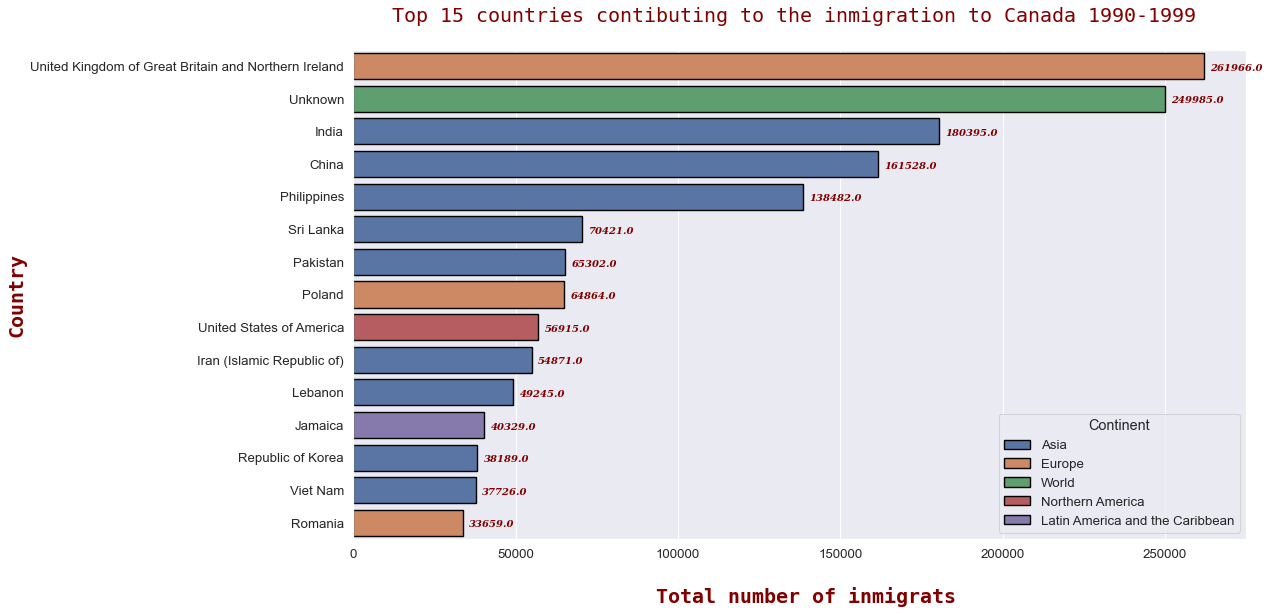

In [58]:
bar,ax = plt.subplots(figsize=(16,9))
ax = sns.barplot(x="Total", y=top90s.index, data=top90s, ci=None,orient='h', dodge = False, edgecolor = 'black', linewidth = 1.4, hue = 'Continent', \
    hue_order = ['Asia','Europe','World','Northern America', 'Latin America and the Caribbean']) 
ax.set_title("Top 15 countries contibuting to the inmigration to Canada 1990-1999 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
ax.set_xlabel ("\n Total number of inmigrats",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
ax.set_ylabel ("Country",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
for rect in ax.patches:
    ax.text (rect.get_width()+2000, rect.get_y() + rect.get_height() / 1.5, s= rect.get_width(), weight='semibold', fontstyle = 'oblique', fontstretch = 'normal'\
        ,fontsize = 10, fontfamily = 'serif', color = 'maroon')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

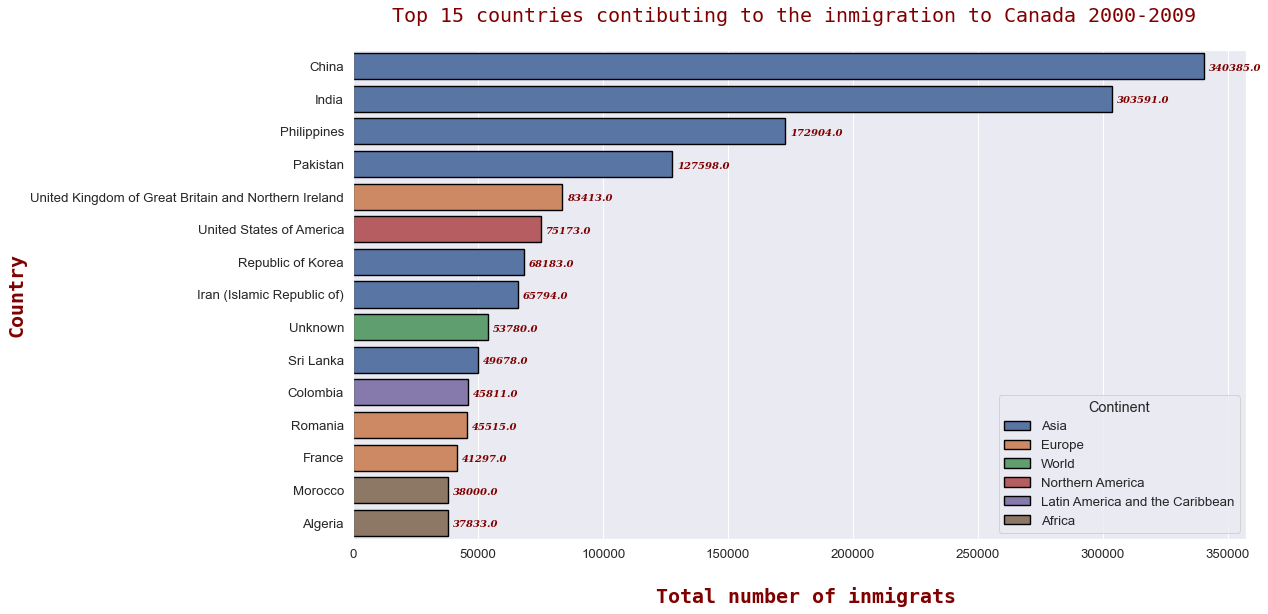

In [59]:
bar,ax = plt.subplots(figsize=(16,9))
ax = sns.barplot(x="Total", y=top00s.index, data=top00s, ci=None,orient='h', edgecolor = 'black', linewidth = 1.4, hue_order = ['Asia','Europe','World','Northern America', 'Latin America and the Caribbean','Africa'], hue = 'Continent', dodge = False) 
ax.set_title("Top 15 countries contibuting to the inmigration to Canada 2000-2009 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
ax.set_xlabel ("\n Total number of inmigrats",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
ax.set_ylabel ("Country",weight='semibold', fontstyle = 'normal', fontstretch = 'normal'\
        ,fontsize = 20, fontfamily = 'monospace', color = 'maroon', variant = 'normal')
for rect in ax.patches:
    ax.text (rect.get_width()+2000, rect.get_y() + rect.get_height() / 1.5, s= rect.get_width(), weight='semibold', fontstyle = 'oblique', fontstretch = 'normal'\
        ,fontsize = 10, fontfamily = 'serif', color = 'maroon')

plt.show()

Podemos observar que en principio Eurpa era el continente con mayor exportación de inmigrantes a Canada, sin embargo al pasar las decadas los países asiáticos sobrepasaron a Europa como los mayores exportadores de inmigrantes a este país. 

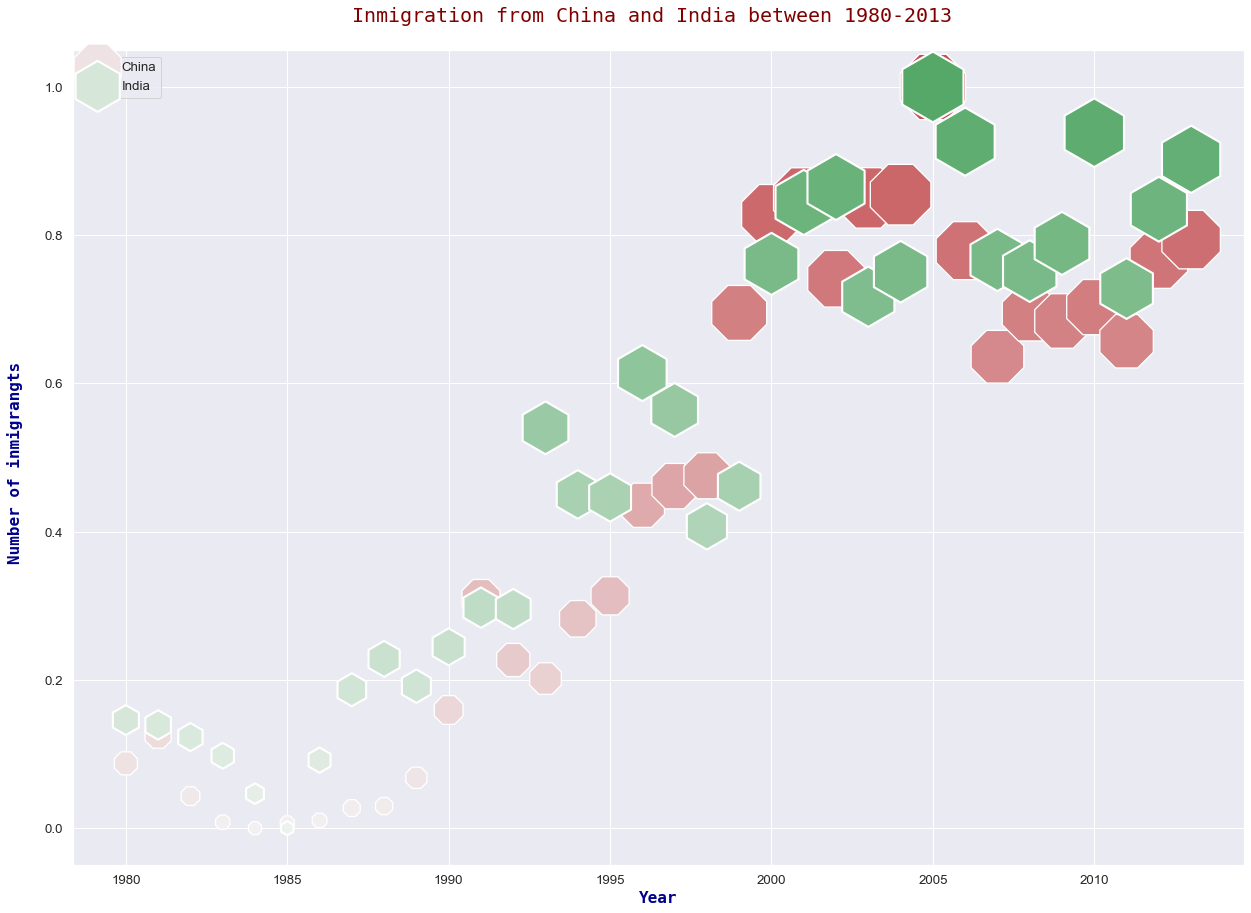

In [60]:
bubledf2 = canCitizenship.loc[['China','India'],:]
bubledf2.drop(columns=['Continent', 'Region', 'DevName', "Total"], inplace=True)
bubledf2 = bubledf2.T
for col in bubledf2.columns:
    bubledf2[col] = minMax(bubledf2[col])

bubledf2['ChiS'] = bubledf2['China']*bubledf2['China'].var()
bubledf2['IndS'] = bubledf2['India']*bubledf2['India'].var()

plt.figure(figsize=(21,15))

sns.scatterplot(x = bubledf2.index, y = 'China', size= 'ChiS', data = bubledf2, sizes=(200, 5000), hue = 'ChiS', palette='light:r' ,legend=False, marker = '8')\
    .set_title("Inmigration from China and India between 1980-2013 \n" ,weight='roman', fontstyle = 'normal', fontstretch = 'normal' ,fontsize = 20, fontfamily = 'monospace', color = 'maroon')
sns.scatterplot(x = bubledf2.index, y = 'India', size= 'IndS', data = bubledf2, sizes=(200, 5000), hue = 'IndS', palette= 'light:g',legend=False, marker = 'h')
plt.xlabel("Year", fontdict = font2)
plt.ylabel("Number of inmigrangts \n", fontdict = font2)
plt.legend(labels = ['China','India'], loc = 'upper left')

En esta gráfica observarmo como los doa paíese que más inmigrantes han exportado a Canada han evolucionado sus tendencias a lo largo del tiempo.